In [1]:
import numpy as np

### 5.2 基于最优化方法的最佳回归系数确定

In [5]:
def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

In [90]:
def sigmoid(inX):
    if inX > 0:
        return 1.0/(1 + np.exp(-inX))
    else:
        return np.exp(inX) / (1 + np.exp(inX))

In [23]:
def gradAscent(dataMatIn, classLabels):
    dataMatrix = np.mat(dataMatIn)             #convert to NumPy matrix
    labelMat = np.mat(classLabels).transpose() #convert to NumPy matrix
    m, n = np.shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = np.ones((n,1))
    for k in range(maxCycles):              #heavy on matrix operations
        h = sigmoid(np.matmul(dataMatrix, weights))     #matrix mult
        error = (labelMat - h)              #vector subtraction
        weights = weights + alpha * np.matmul(dataMatrix.transpose(), error) #matrix mult
    return weights

In [7]:
dataArr, labelMat = loadDataSet()

In [27]:
weights = gradAscent(dataArr, labelMat)

In [28]:
print(weights)

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


In [44]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    %matplotlib inline
    dataMat,labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0] 
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0, 0]-weights[1, 0]*x)/weights[2, 0]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

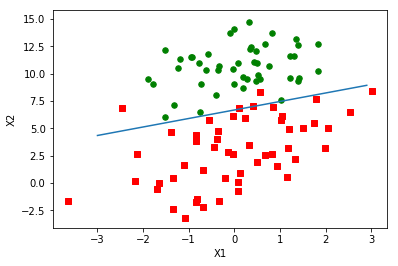

In [45]:
plotBestFit(weights)

In [56]:
def stocGradAscent0(dataMatrix, classLabels):
    m,n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)   #initialize to all ones
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * np.array(dataMatrix[i])
    return weights

In [73]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = np.shape(dataMatrix)
    weights = np.ones(n)   #initialize to all ones
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.0001    #apha decreases with iteration, does not 
            randIndex = int(np.random.uniform(0,len(dataIndex)))#go to 0 because of the constant
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * np.array(dataMatrix[randIndex])
            dataIndex.pop(randIndex)
    return weights

In [59]:
weightsSto0 = stocGradAscent0(dataArr, labelMat)

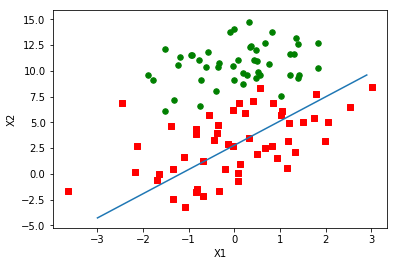

In [63]:
plotBestFit(weightsSto0.reshape(3,1))

In [74]:
weightsSto1 = stocGradAscent1(dataArr, labelMat)

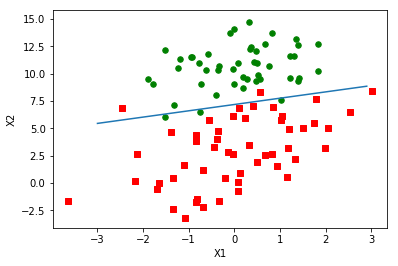

In [75]:
plotBestFit(weightsSto1.reshape(3,1))

### 5.3 示例：从疝气病症预测病马的死亡率

In [76]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0

In [81]:
def colicTest():
    frTrain = open('horseColicTraining.txt'); frTest = open('horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(np.array(trainingSet), trainingLabels, 1000)
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(np.array(lineArr), trainWeights))!= int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print("the error rate of this test is: %f" % errorRate)
    return errorRate

In [91]:
colicTest()

the error rate of this test is: 0.328358


0.3283582089552239

In [92]:
def multiTest():
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print("after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests)))

In [93]:
multiTest()

the error rate of this test is: 0.358209
the error rate of this test is: 0.283582
the error rate of this test is: 0.388060
the error rate of this test is: 0.447761
the error rate of this test is: 0.328358
the error rate of this test is: 0.388060
the error rate of this test is: 0.402985
the error rate of this test is: 0.298507
the error rate of this test is: 0.268657
the error rate of this test is: 0.328358
after 10 iterations the average error rate is: 0.349254
